## Creating arrays in NumPy and simple plots

The following notebook demonstrates a few ways of creating numpy arrays and finishes with a simple plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [2]:
#Ways to create arrays

#1. use np.array() on an existing list

#create a list and an array
some_list = [1,2,3,4,5,6,7,13]
some_array = np.array(some_list)

#1* Illustrate how the same operation can be performed on all elements in a list vs an array

#Modify all elemens of a list
for index in range(len(some_list)):
    some_list[index] = some_list[index] + 2

#Modify all elemens of an array
some_array = some_array + 2

#check the result
print(some_list)
print(some_array)

[3, 4, 5, 6, 7, 8, 9, 15]
[ 3  4  5  6  7  8  9 15]


In [3]:
#2.a use range to create a list then convert using np.array()
range_list = list(range(10))
range_array = np.array(range_list)
print(range_list)
print(range_array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
#2.b use np.arange directly
better_range_array = np.arange(10)
print(better_range_array)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
#3.a use custom range to create a list then convert using np.array()
range_list = list(range(10,22,2))
range_array = np.array(range_list)
print(range_list)
print(range_array)

[10, 12, 14, 16, 18, 20]
[10 12 14 16 18 20]


In [6]:
#3.b use (custom) np.arange directly
#advantage: can use keyword arguments
better_range_array = np.arange(stop = 22, start = 10, step = 2)
print(better_range_array)

[10 12 14 16 18 20]


In [7]:
#4.a list comprehension then convert using np.array()
sample_list = [x/9 * np.pi  for x in range(10)]
sample_array = np.array(sample_list)
print(sample_list)
print(sample_array)

[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [8]:
#4.b use np.linspace directly
better_sample_array = np.linspace(start = 0, stop = np.pi, num = 10)
print(better_sample_array)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [9]:
#4.c redundant (and not good)
okay_sample_array = np.arange(10) / 9 * np.pi
print(okay_sample_array)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [10]:
#check that the methods 4.a-4.c are equivalent
print(sample_array - better_sample_array)
print(sample_array - okay_sample_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
#Explanation of 4.c: break down into individual steps
okay_sample_array = np.arange(10)
print(okay_sample_array)
#scale to 1
okay_sample_array = okay_sample_array / 9
print(okay_sample_array)
#scale to PI
okay_sample_array = okay_sample_array * np.pi
print(okay_sample_array)

[0 1 2 3 4 5 6 7 8 9]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [12]:
#TASKS
#1. Generate an array of 5000 equidistant points
#   on the interval [0,1] (both limits inclusive)
#a) using np.linspace                                  (arr_ls)
#b) using np.arange                                    (arr_ar)
#c) using range (with list comprehension if you like)  (arr_rn)
#d) print(arr_ls - arr_ar) and print(arr_ls - arr_rn)

In [13]:
#Solution
arr_ls = np.linspace(0,1,5000)
arr_ar = np.arange(5000) / 4999
arr_rn = np.array([x / 4999 for x in range(5000)])

In [14]:
diff1 = arr_ls - arr_ar
print(diff1)

[0. 0. 0. ... 0. 0. 0.]


In [15]:
diff2 = arr_ls - arr_rn
print(diff2)

[0. 0. 0. ... 0. 0. 0.]


In [16]:
#we expect 0.0 if there are only zero-es in the diff array
print(np.sum(np.absolute(diff1))) #good sum of abs
print(np.absolute(np.sum(diff1))) #bad abs of sum

6.910270966553611e-15
6.910270966553611e-15


In [17]:
#find max deviation from 0
error_1 = np.max(np.absolute(diff1))
print(error_1)

#where is it in diff1??
#np.where(diff1 == error_1)[0].size + np.where(diff1 != error_1)[0].size
np.where(diff1 == error_1)

1.1102230246251565e-16


(array([2531, 2642, 2700, 2758, 2869, 2927, 2985, 3043, 3096, 3154, 3212,
        3270, 3328, 3381, 3439, 3497, 3555, 3608, 3666, 3724, 3782, 3835,
        3893, 3951, 4009, 4062, 4067, 4120, 4178, 4236, 4289, 4294, 4347,
        4352, 4405, 4463, 4521, 4574, 4579, 4632, 4690, 4748, 4801, 4806,
        4859, 4917, 4975], dtype=int64),)

In [18]:
#naive check whether all elements of 2 arrays are equal
np.sum(arr_ls == arr_ar)

4903

In [19]:
#better check whether all elements of 2 arrays are equal
#see float-point tollerance, float-point rounding error
np.sum(np.isclose(arr_ls, arr_ar, rtol = 0, atol= 1e-15))

5000

## Plot some arrays

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
#set some plot defaults
#plt.rcParams['figure.figsize'] = [16,9]
#plt.rcParams['image.cmap'] = 'gray'
#plt.rcParams['axes.grid'] = True
#plt.rcParams['figure.dpi'] = 120


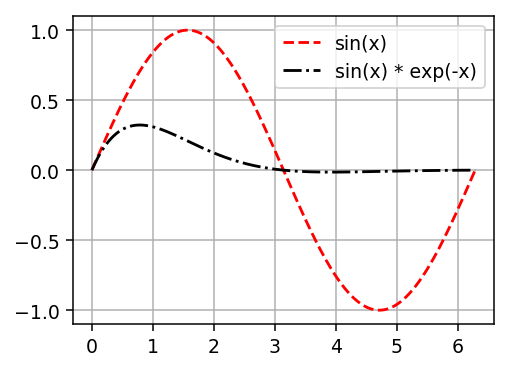

In [21]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)
y2 = np.exp(-x) * np.sin(x)

fig = plt.figure(figsize=(4,3), dpi = 136)
ax = fig.add_subplot(111)
ax.plot(x,y, "--",color = "red", label = "sin(x)")
ax.plot(x,y2, "-.",color = "black", label = "sin(x) * exp(-x)")
ax.grid(True)
ax.legend()
plt.show()

## Compare speed between lists and arrays

Computation finished. Time needed: 4.80861 seconds


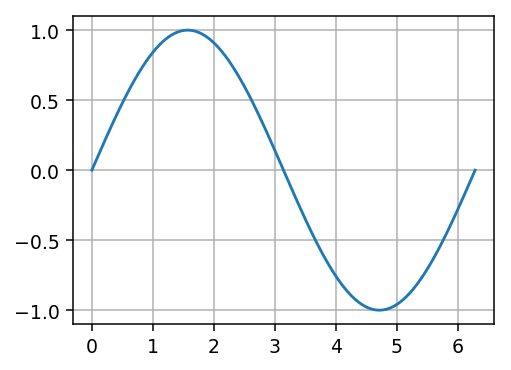

In [22]:
#Use lists
POINTS = 10000000
x_list = []
sin_list = []

start = time()
for i in range(POINTS):
    x = i / POINTS * np.pi * 2
    x_list.append(x)
    sin_list.append(math.sin(x))
print("Computation finished. Time needed: {:.5f} seconds".format(time()-start))

fig = plt.figure(figsize=(4,3), dpi = 136)
ax = fig.add_subplot(111)
ax.plot(x_list, sin_list)
ax.grid(True)
plt.show()

Computation finished. Time needed: 0.05866 seconds


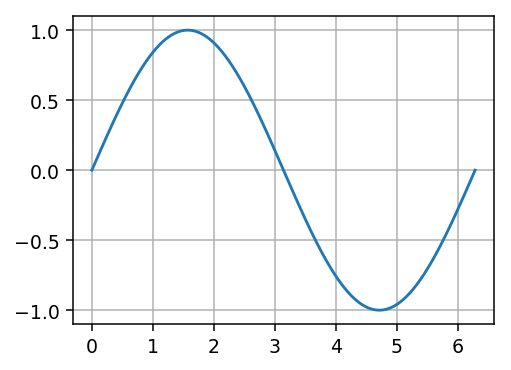

In [23]:
#Use arrays
POINTS = 10000000

start = time()
x_np = np.linspace(0, np.pi*2, POINTS)
sin_np = np.sin(x_np)
print("Computation finished. Time needed: {:.5f} seconds".format(time()-start))

fig = plt.figure(figsize=(4,3), dpi = 136)
ax = fig.add_subplot(111)
ax.plot(x_np, sin_np)
ax.grid(True)
plt.show()